# Profiling and Optimization Hands-On

In [32]:
import numpy as np
from math import sin, cos
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1: which is faster?

Given a large 2D array, we will explore different ways to create the array and to calculate its mean. Determine which one is fastest, using the `%timeit` notebook function.

### setup: define our 2D array:

We'll make some dummy test data that looks like:

$M_{ij} = \sin(i)\cos(0.1 j)$

and we will construct this array in multiple ways.

In [33]:
def create_array_loop(N,M):
    arr = []
    for y in range(M):
        row = []
        for x in range(N):
            row.append(sin(x)*cos(0.1*y))
        arr.append(row)
    return arr

def create_array_list(N,M):
    """a 2D array using a list-comprehension"""
    return [[sin(x)*cos(0.1*y) for x in range(N)] for y in range(M)]  

def create_array_np(N,M):
    """ a 2D array using numpy"""
    X,Y = np.meshgrid(np.arange(N), np.arange(M))
    return np.sin(X)*np.cos(0.1*Y)

Let's first just plot the arrays, to see if they are the same:

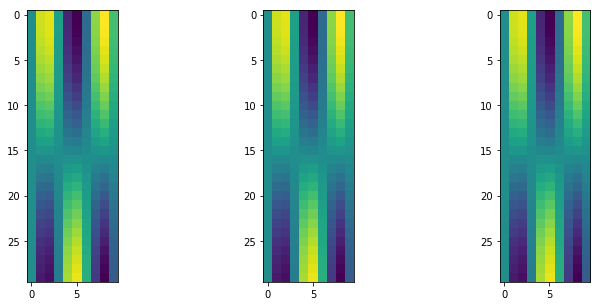

In [34]:
N=10; M=30  # our array dimensions
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow( create_array_loop(N,M))
plt.subplot(1,3,2)
plt.imshow( create_array_list(N,M))
plt.subplot(1,3,3)
plt.imshow( create_array_np(N,M))

### Task: determine which array creation routine is fastest

And make a plot of the speed of each!   Does the result change much when the array size becomes larger? Try much larger sizes for N and M

Hint: use the `%timeit -o` magic function to have `%timeit` return results (see the timeit help)

### SOLUTION:

## Task 2: determine the fastest way to find the mean of our array

note that `create_array_list()` and `create_array_loop` both return a list-of-lists, while `create_array_np` returns a 2D numpy array.   There are multiple ways to compute the mean of these arrays.  See again which is fastest!

try at least:

1. using the built-in python `sum` function and either a for-loop or list-comprehension
2. using pure numpy (e.g. `array.mean()`)
3. other ways you can think of!

### SOLUTION

## Task 3: Speed up a real-world problem!

Here your task is to speed up an algorithm for finding the solution to the *Heat Equation* in 2D using a finite-difference method, given an initial temperature distribution.  

the heat equation is defined as:

$$ \frac{du}{dt}  = \alpha \nabla^2 u$$

Where $u$ is the temperature. This can be approximated simply by iterating in time and approximating the spatial gradient using neighboring array elements. For time-step $k$ of width $\Delta t$ and spatial width $\Delta x$:

$$ \frac{u^{k+1}_{ij}-u^k_{ij}}{\Delta t}  = \frac{\alpha}{(\Delta x)^2} \left( u^k_{i,j-1} + u^k_{i-1,j} - 4 u^k_{i,j} + u^k_{i+1,j} + u^k_{i,j+1}\right)$$


Below we give a naïeve way to solve this, using for-loops (which are not ideal in python). See if you can speed this up by either:

1. re-writing the code to use numpy to get rid of the spatial loops 
2. using cython or numba to compile the function (may need to experiment also with some of their compile options)

You should also try to see what the memory usage is! (hint: use the memory_profiler module). Is there a memory leak?

#### the setup:
set up the initial condtions (defining the temperature at the boundary, as well as some hot-spots that are initially at a particular temperature)

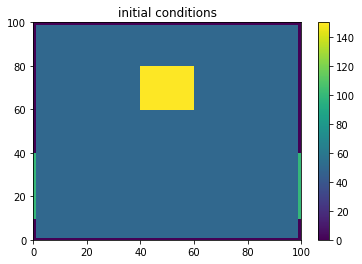

In [45]:
N=100; M=100  # define the spatial grid
grid = np.zeros(shape=(N,M))
grid[10:40,:] = 100 # a hot-spot on the border
grid[1:-1,1:-1] = 50 # some initial temperature in the middle
grid[60:80, 40:60] = 150 # a hot-spot initially heated at the start, that will cool down

plt.pcolormesh(grid)
plt.colorbar()
plt.title("initial conditions")

In [46]:
def solve_heat_equation_loops(init_cond, iterations=100, delta_x=1.0, alpha=1.0):

    delta_t = delta_x**2/(4*alpha)
    prev = np.copy(init_cond)
    cur = np.copy(init_cond)
    N,M = init_cond.shape

    for k in range(iterations):
        for i in range(1,N-1):
            for j in range(1,M-1):
                cur[i,j] = prev[i,j] + alpha*delta_t/delta_x**2 * (
                    prev[i,j-1] + prev[i-1,j] - 4*prev[i,j] + prev[i,j+1] + prev[i+1,j]
                )
        
        prev,cur = cur,prev  #swap pointers

    return prev

We'll also define a convenience function to test the results (you can use this same plotter with your own solver)

In [47]:
def plot_heat_equation(solver, iters=(2,10,100,1000)):
    
    fig, axes = plt.subplots(1,len(iters), figsize=(15,3))

    for ii, iterations in enumerate(iters):
        result = solver(init_cond=grid, iterations=iterations)
        axes[ii].pcolormesh(result, vmin=0, vmax=100)
        axes[ii].set_title("{} iterations".format(iterations))



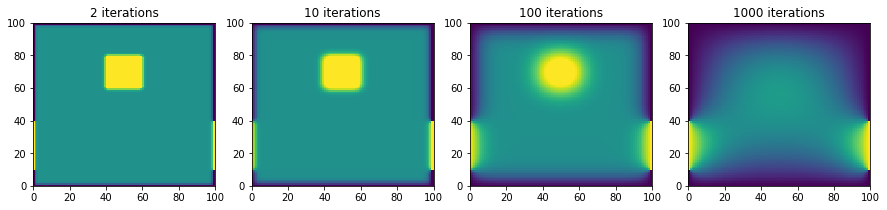

In [48]:
plot_heat_equation(solver=solve_heat_equation_loops)

Note that our code is quite slow... 

### Your turn!

***Write an improved verson, and show how much faster it is, as well as how much memory it uses:***

(hint: if done right, you should get a factor of about 100 speed increase)

In [49]:
def my_heat_equation_solver(init_cond, iterations=100, delta_x=1.0, alpha=1.0):
    ## your code here
    return init_cond # replace with real return value

In [50]:
#plot_heat_equation(solver=my_heat_equation_solver)

### SOLUTION

there are many ways to achieve this...